<a href="https://colab.research.google.com/github/Chehan2004/Machine_Learning_2604_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

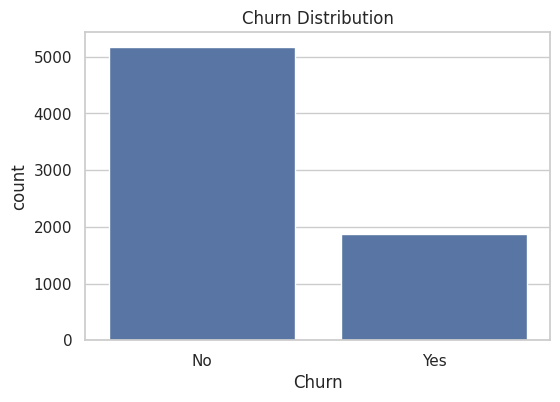


Churn Rate (%):
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


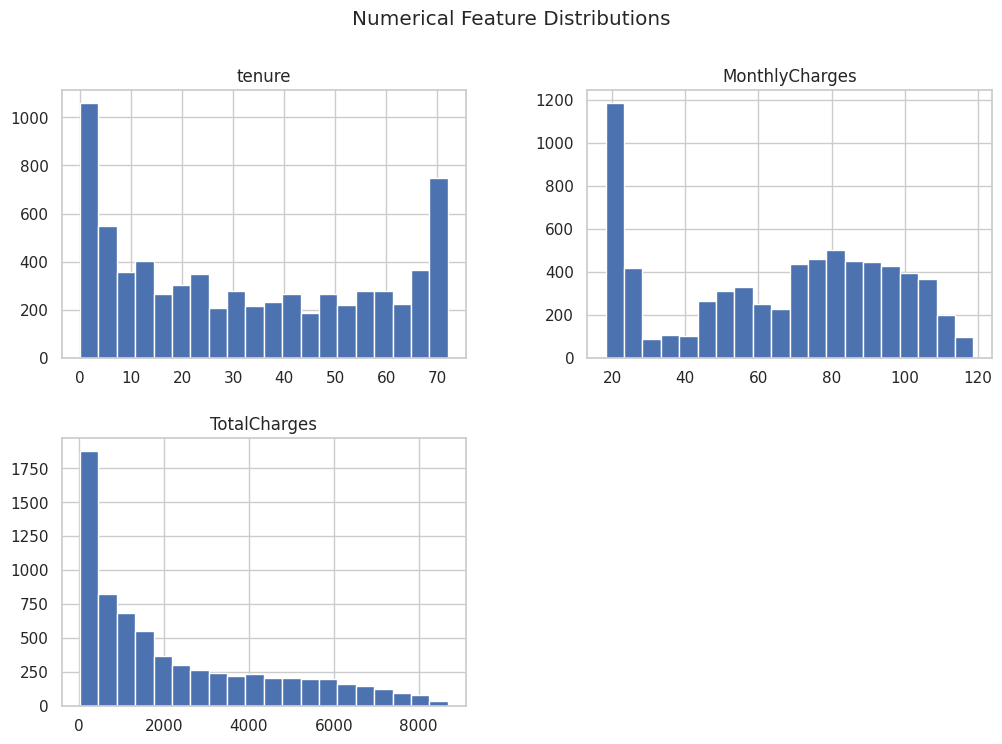

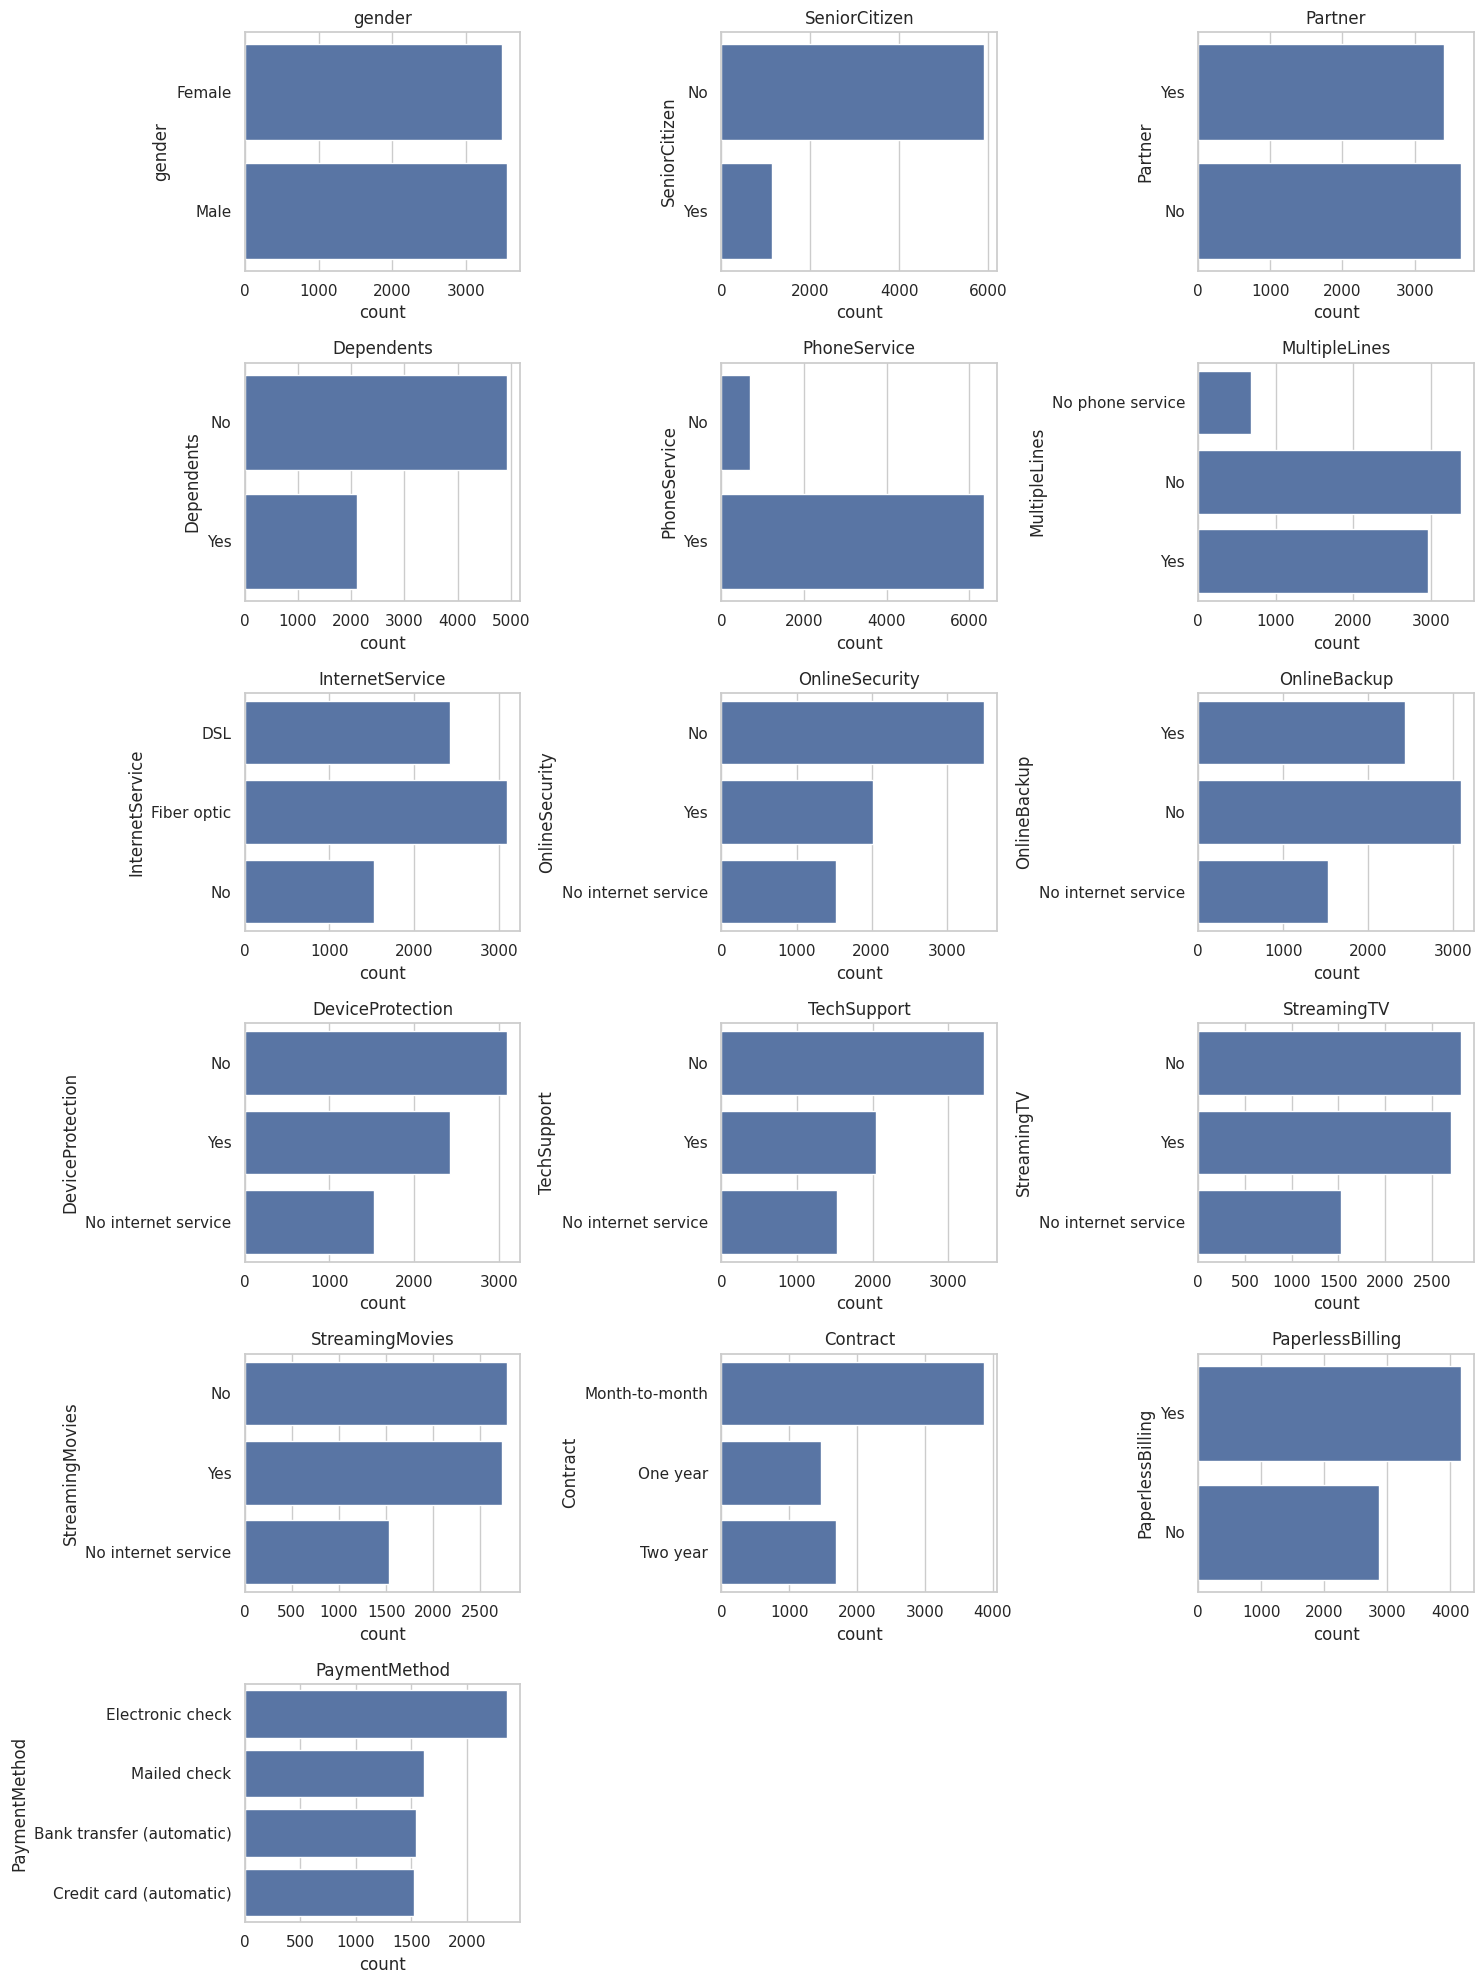

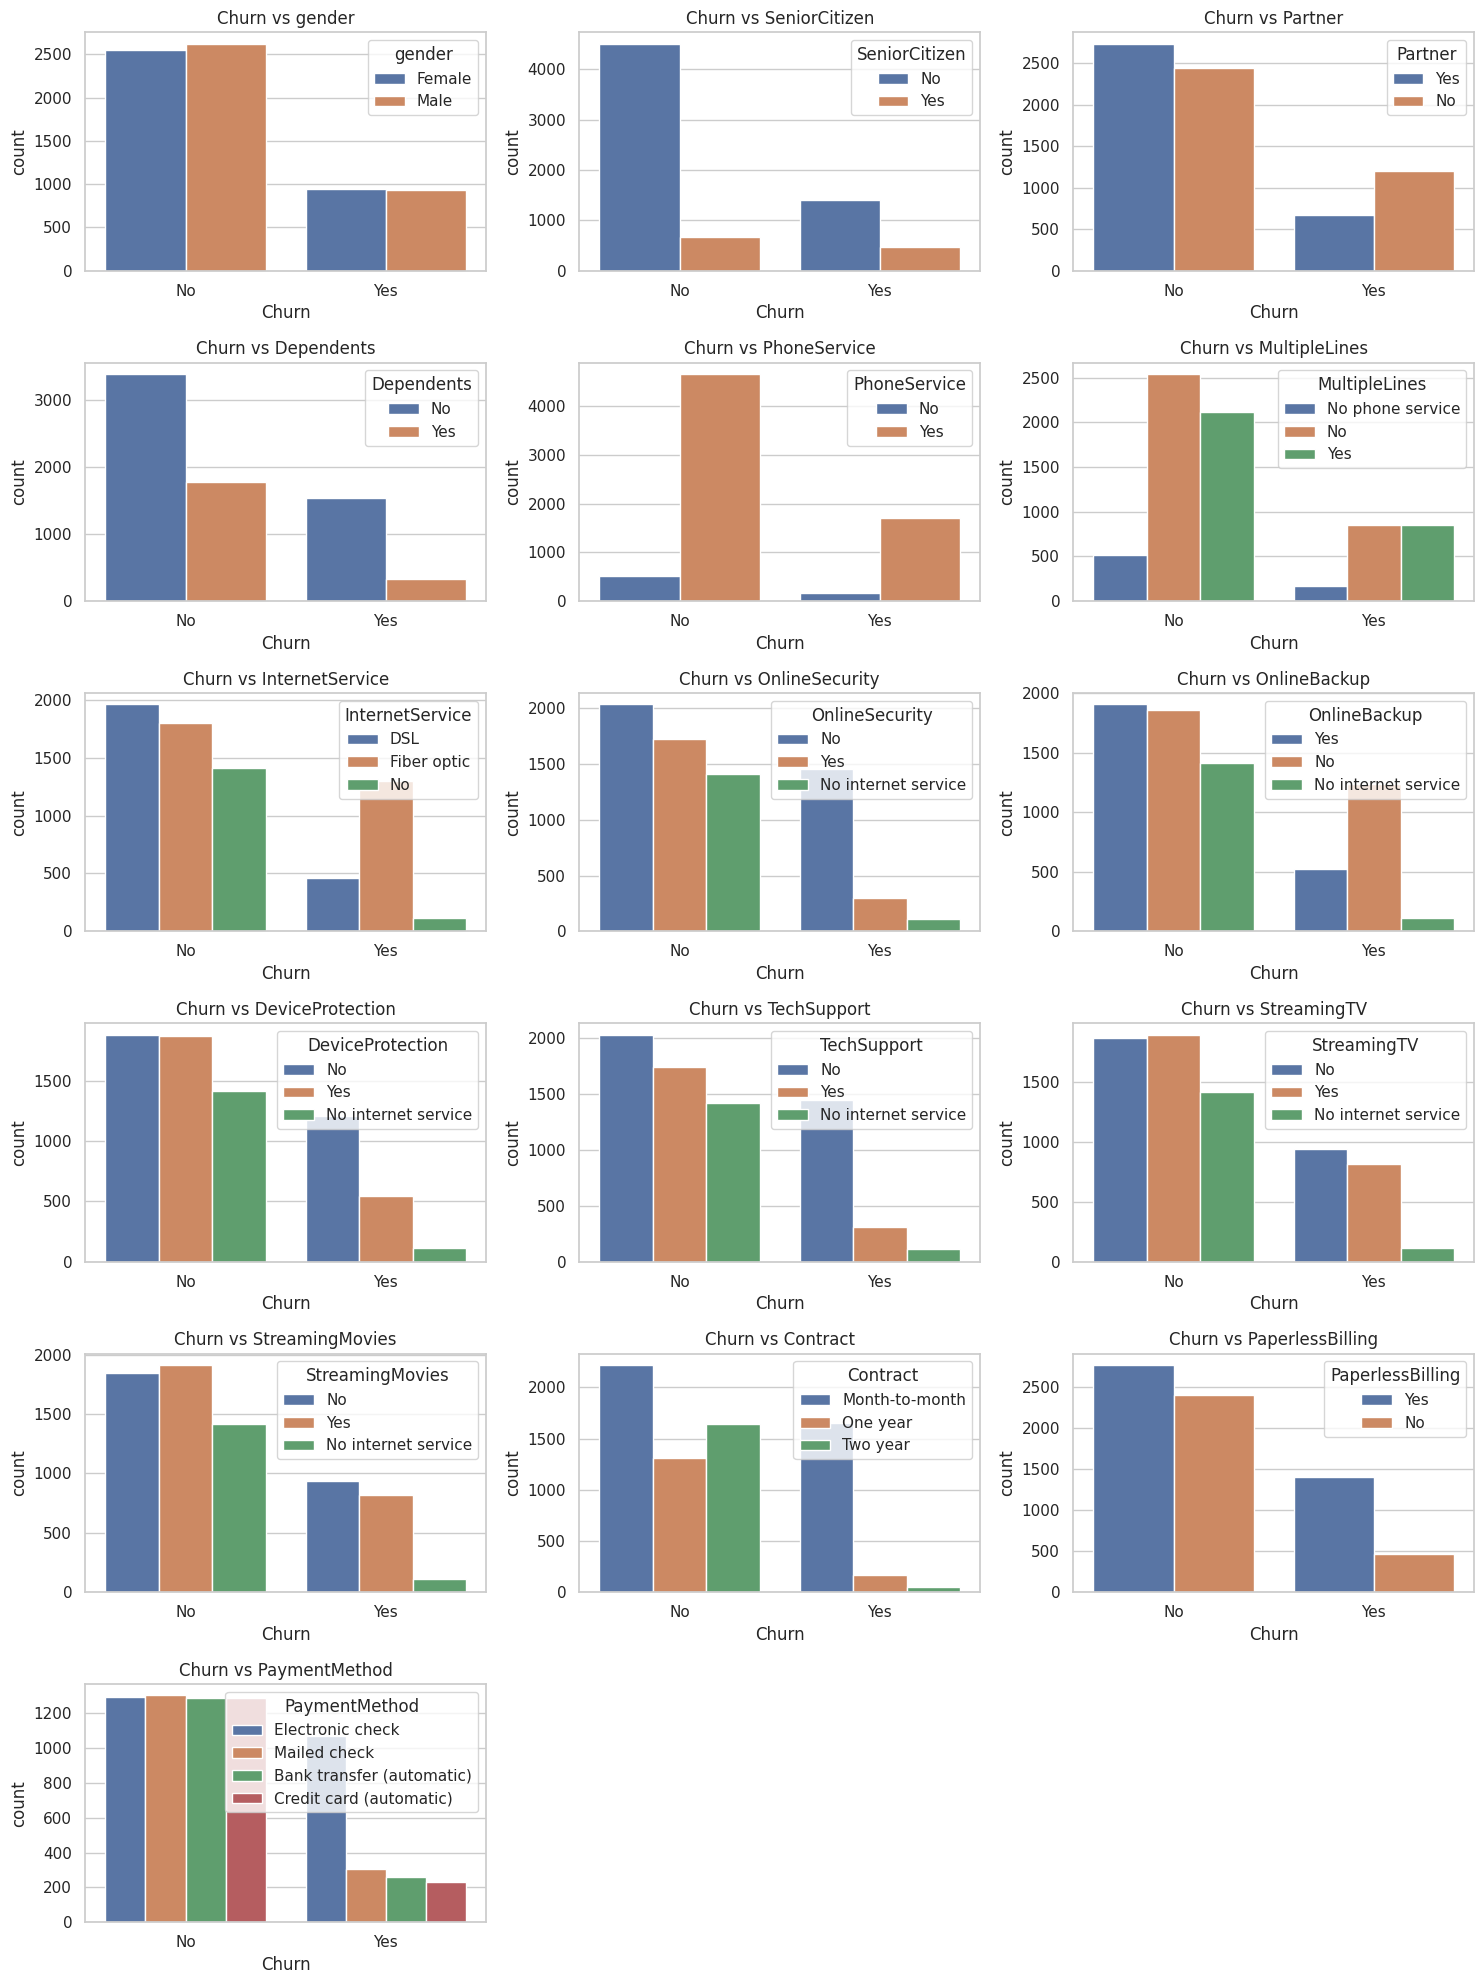

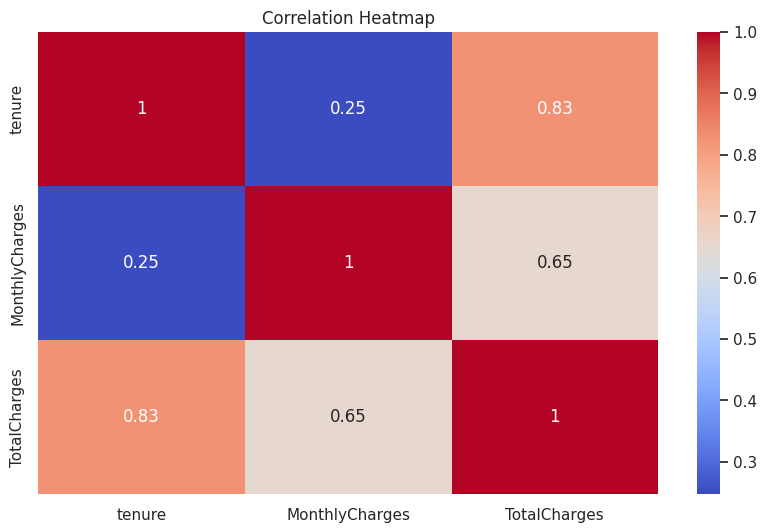

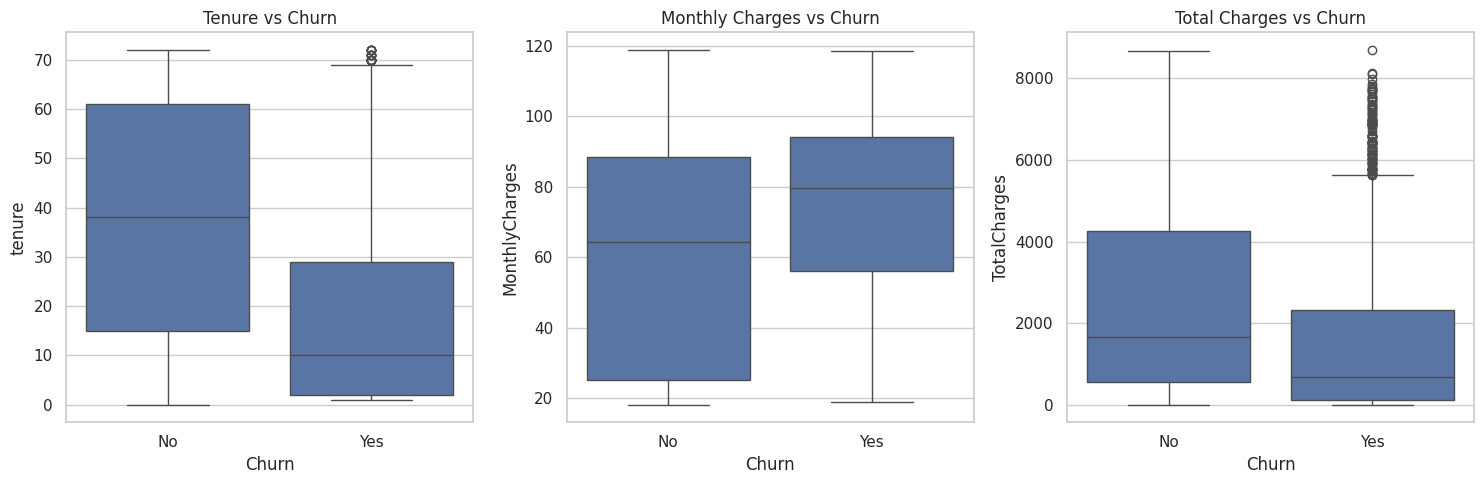

In [14]:
# eda and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Shape:", df.shape)
df.head()




df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary (Numerical):\n", df.describe())
print("\nSummary (Categorical):\n", df.describe(include='object'))



df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df.drop("customerID", axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('object')




plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True)*100
print("\nChurn Rate (%):\n", churn_rate)




num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()




cat_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

plt.figure(figsize=(15,20))
i = 1
for col in cat_cols:
    plt.subplot(6, 3, i)
    sns.countplot(y=df[col])
    plt.title(col)
    i += 1
plt.tight_layout()
plt.show()


# CHURN vs CATEGORICAL FEATURES

plt.figure(figsize=(15,20))
i = 1
for col in cat_cols:
    plt.subplot(6, 3, i)
    sns.countplot(x='Churn', hue=col, data=df)
    plt.title(f"Churn vs {col}")
    i += 1
plt.tight_layout()
plt.show()




plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()




plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()

In [15]:
# PREPROCESSING

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


CSV_PATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(CSV_PATH)

print("Original shape:", df.shape)


if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Normalize Churn
df['Churn'] = df['Churn'].astype(str).str.strip()


if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

print("Cleaned shape:", df.shape)


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.select_dtypes(include=['object']).columns if c != 'Churn']

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

#train d split
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

#dt pp
label_encoders = {}
X_dt_train = X_train.copy()
X_dt_test = X_test.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_dt_train[col] = X_dt_train[col].astype(str)
    le.fit(X_dt_train[col])

    X_dt_train[col] = le.transform(X_dt_train[col])

    mapping = {cat: idx for idx, cat in enumerate(le.classes_)}

    def map_or_new(v, mapping=mapping):
        return mapping[v] if v in mapping else len(mapping)

    X_dt_test[col] = X_dt_test[col].astype(str).map(map_or_new).astype(int)

    label_encoders[col] = le

y_dt_train = y_train.copy()
y_dt_test = y_test.copy()

print("\nDT preprocessing complete.")
print("X_dt_train shape:", X_dt_train.shape)

# nn pp
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('cat', ohe, categorical_cols)
    ]
)

X_nn_train = preprocessor.fit_transform(X_train)
X_nn_test = preprocessor.transform(X_test)

y_nn_train = y_train.to_numpy()
y_nn_test = y_test.to_numpy()

print("\nNN preprocessing complete.")
print("X_nn_train shape:", X_nn_train.shape)
print("X_nn_test shape:", X_nn_test.shape)


print("\n===== SUMMARY =====")
print("DT:", X_dt_train.shape, X_dt_test.shape)
print("NN:", X_nn_train.shape, X_nn_test.shape)
print("y:", len(y_train), len(y_test))
print("====================")


Original shape: (7043, 21)
Cleaned shape: (7043, 20)
Numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Train: (5634, 19) Test: (1409, 19)

DT preprocessing complete.
X_dt_train shape: (5634, 19)

NN preprocessing complete.
X_nn_train shape: (5634, 46)
X_nn_test shape: (1409, 46)

===== SUMMARY =====
DT: (5634, 19) (1409, 19)
NN: (5634, 46) (1409, 46)
y: 5634 1409


/tmp/ipython-input-2434437025.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [16]:
#dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#before tune
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_dt_train, y_dt_train)

y_base_pred = baseline_dt.predict(X_dt_test)
y_base_proba = baseline_dt.predict_proba(X_dt_test)[:, 1]

baseline_results = {
    "Accuracy": accuracy_score(y_dt_test, y_base_pred),
    "Precision": precision_score(y_dt_test, y_base_pred),
    "Recall": recall_score(y_dt_test, y_base_pred),
    "F1": f1_score(y_dt_test, y_base_pred),
    "ROC_AUC": roc_auc_score(y_dt_test, y_base_proba)
}

print("\nBASELINE Decision Tree Results (Before Tuning)")
for k, v in baseline_results.items():
    print(f"{k}: {v:.4f}")


# h tuning
param_grid = {
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    dt,
    param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)


grid_dt.fit(X_dt_train, y_dt_train)

best_dt = grid_dt.best_estimator_
print("\nBest Decision Tree Params:", grid_dt.best_params_)

# result tuned
y_dt_pred = best_dt.predict(X_dt_test)
y_dt_proba = best_dt.predict_proba(X_dt_test)[:, 1]

dt_results = {
    "Accuracy": accuracy_score(y_dt_test, y_dt_pred),
    "Precision": precision_score(y_dt_test, y_dt_pred),
    "Recall": recall_score(y_dt_test, y_dt_pred),
    "F1": f1_score(y_dt_test, y_dt_pred),
    "ROC_AUC": roc_auc_score(y_dt_test, y_dt_proba)
}

print("\nDecision Tree Results AFTER Tuning:")
for k, v in dt_results.items():
    print(f"{k}: {v:.4f}")



BASELINE Decision Tree Results (Before Tuning)
Accuracy: 0.7303
Precision: 0.4924
Recall: 0.5187
F1: 0.5052
ROC_AUC: 0.6625
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

Decision Tree Results AFTER Tuning:
Accuracy: 0.7757
Precision: 0.6648
Recall: 0.3128
F1: 0.4255
ROC_AUC: 0.8156


In [17]:
# nn

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X_train = np.array(X_nn_train).astype("float32")
X_test  = np.array(X_nn_test).astype("float32")

y_train = np.array(y_nn_train).astype("float32")
y_test  = np.array(y_nn_test).astype("float32")


# Manual weights (balanced)

unique, counts = np.unique(y_train, return_counts=True)
total = len(y_train)
class_weights = {}

for c, count in zip(unique, counts):
    class_weights[int(c)] = total / (len(unique) * count)

print("Class Weights:", class_weights)

input_dim = X_train.shape[1]


# Function model building

def build_model(units1, units2, drop1, drop2, lr):
    model = keras.Sequential([
        keras.layers.Dense(units1, activation="relu", input_shape=(input_dim,)),
        keras.layers.Dropout(drop1),
        keras.layers.Dense(units2, activation="relu"),
        keras.layers.Dropout(drop2),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# function eval predi
def evaluate_model(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return acc, precision, recall, f1, roc_auc

# basel model
print("\n====================================")
print(" TRAINING BASELINE MODEL")
print("====================================")

baseline = build_model(
    units1=64, units2=32,
    drop1=0.2, drop2=0.2,
    lr=0.001
)

baseline.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.15,
    class_weight=class_weights,
    verbose=1
)

# Baseline predictions
baseline_proba = baseline.predict(X_test)
baseline_pred = (baseline_proba >= 0.5).astype(int)

baseline_acc, baseline_prec, baseline_rec, baseline_f1, baseline_roc = evaluate_model(
    y_test, baseline_pred.flatten(), baseline_proba
)

print("\nBaseline Metrics:")
print(f"Accuracy  : {baseline_acc:.4f}")
print(f"Precision : {baseline_prec:.4f}")
print(f"Recall    : {baseline_rec:.4f}")
print(f"F1-Score  : {baseline_f1:.4f}")
print(f"ROC-AUC   : {baseline_roc:.4f}")

# h tuning
print("\n====================================")
print(" HYPERPARAMETER TUNING")
print("====================================")

param_grid = [
    {"units1": 64, "units2": 32, "drop1": 0.2, "drop2": 0.2, "lr": 0.001},
    {"units1": 128, "units2": 64, "drop1": 0.2, "drop2": 0.3, "lr": 0.001},
    {"units1": 128, "units2": 32, "drop1": 0.3, "drop2": 0.3, "lr": 0.0005},
]

best_acc = -1
best_params = None
best_model = None

for params in param_grid:
    model = build_model(**params)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=64,
        validation_split=0.15,
        class_weight=class_weights,
        verbose=0
    )

    val_acc = history.history["val_accuracy"][-1]

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = params
        best_model = model

print("Best Params:", best_params)
print("Best Validation Accuracy:", best_acc)

# train final model
print("\n====================================")
print(" TRAINING BEST FINAL MODEL")
print("====================================")

best_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.15,
    class_weight=class_weights,
    verbose=1
)

# Final predictions
final_proba = best_model.predict(X_test)
final_pred = (final_proba >= 0.5).astype(int)

final_acc, final_prec, final_rec, final_f1, final_roc = evaluate_model(
    y_test, final_pred.flatten(), final_proba
)

#f results
print("\n==============================")
print(" BASELINE METRICS")
print(f"Accuracy  : {baseline_acc:.4f}")
print(f"Precision : {baseline_prec:.4f}")
print(f"Recall    : {baseline_rec:.4f}")
print(f"F1-Score  : {baseline_f1:.4f}")
print(f"ROC-AUC   : {baseline_roc:.4f}")
print("------------------------------")
print(" FINAL BEST MODEL METRICS")
print(f"Accuracy  : {final_acc:.4f}")
print(f"Precision : {final_prec:.4f}")
print(f"Recall    : {final_rec:.4f}")
print(f"F1-Score  : {final_f1:.4f}")
print(f"ROC-AUC   : {final_roc:.4f}")
print("==============================")


Class Weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}

 TRAINING BASELINE MODEL
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5870 - loss: 0.6180 - val_accuracy: 0.7139 - val_loss: 0.5409
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7530 - loss: 0.5239 - val_accuracy: 0.7092 - val_loss: 0.5430
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7594 - loss: 0.4759 - val_accuracy: 0.6962 - val_loss: 0.5600
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.4960 - val_accuracy: 0.7104 - val_loss: 0.5275
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4864 - val_accuracy: 0.7151 - val_loss: 0.5257
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7615 - loss: 0.4750 - val_accuracy: 0.7057 - val_loss: 0.5300
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.4926 - val_accuracy: 0.7116 - val_loss: 0.5207
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.4682 - val_accuracy: 0.7045 - val_loss: 0.5401
Epo

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Params: {'units1': 128, 'units2': 64, 'drop1': 0.2, 'drop2': 0.3, 'lr': 0.001}
Best Validation Accuracy: 0.7115839123725891

 TRAINING BEST FINAL MODEL
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.4582 - val_accuracy: 0.7057 - val_loss: 0.5474
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7959 - loss: 0.4230 - val_accuracy: 0.7175 - val_loss: 0.5292
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7889 - loss: 0.4266 - val_accuracy: 0.7009 - val_loss: 0.5589
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7897 - loss: 0.4327 - val_accuracy: 0.7045 - val_loss: 0.5602
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7911 - loss: 0.4219 - val_accuracy: 0.6820 - val_loss: 0.5832
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7772 - loss: 0.4327 - val_accuracy: 0.7033 - val_loss: 0.5531
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7939 - loss: 0.41

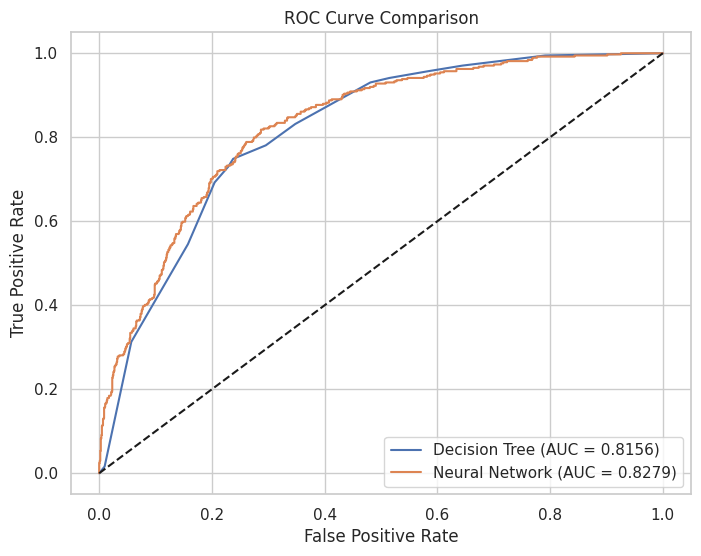

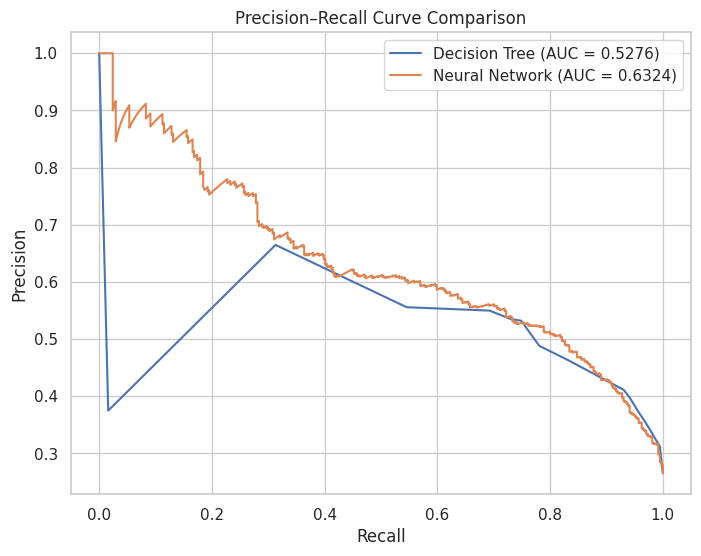

====== MODEL PERFORMANCE COMPARISON ======

                      Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Rank (Accuracy)
      Decision Tree (Tuned)  0.775727   0.664773 0.312834  0.425455 0.815635                1
Neural Network (Best Tuned)  0.740951   0.507589 0.804813  0.622544 0.827931                2

Models ranked by Accuracy (1 = Best)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# 1. ROC CURVE

# dt ROC
fpr_dt, tpr_dt, _ = roc_curve(y_dt_test, y_dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# nn ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, final_proba)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.4f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.4f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# PRECISION – RECALL CURVE

# DT PR Curve
prec_dt, rec_dt, _ = precision_recall_curve(y_dt_test, y_dt_proba)
pr_auc_dt = auc(rec_dt, prec_dt)

# NN PR Curve
prec_nn, rec_nn, _ = precision_recall_curve(y_test, final_proba)
pr_auc_nn = auc(rec_nn, prec_nn)

plt.figure(figsize=(8,6))
plt.plot(rec_dt, prec_dt, label=f"Decision Tree (AUC = {pr_auc_dt:.4f})")
plt.plot(rec_nn, prec_nn, label=f"Neural Network (AUC = {pr_auc_nn:.4f})")

plt.title("Precision–Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()




results = pd.DataFrame({
    "Model": ["Decision Tree (Tuned)", "Neural Network (Best Tuned)"],
    "Accuracy": [
        dt_results["Accuracy"],
        final_acc
    ],
    "Precision": [
        dt_results["Precision"],
        final_prec
    ],
    "Recall": [
        dt_results["Recall"],
        final_rec
    ],
    "F1-Score": [
        dt_results["F1"],
        final_f1
    ],
    "ROC-AUC": [
        dt_results["ROC_AUC"],
        final_roc
    ]
})

# rank by accuracy
results["Rank (Accuracy)"] = results["Accuracy"].rank(ascending=False).astype(int)

# Sort by rank
results = results.sort_values("Rank (Accuracy)")


print("====== MODEL PERFORMANCE COMPARISON ======\n")
print(results.to_string(index=False))
print("\nModels ranked by Accuracy (1 = Best)")
